# RL for Logistics - Robots in a warehouse

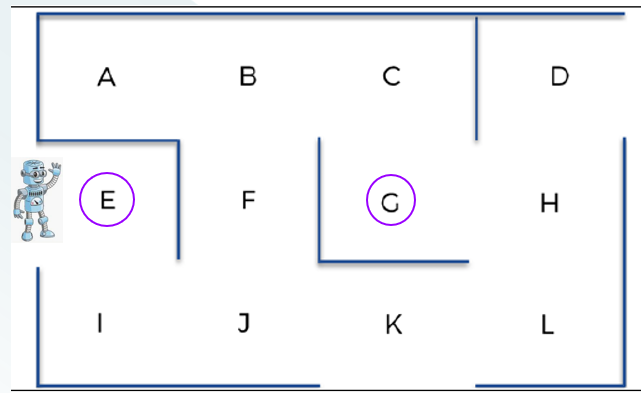

To each couple of state and action (s, a), we need to associate a numeric value
Q(s, a)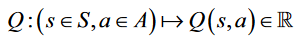

Let's say we are in a specific state ,
at a specific time t. When we perform an action randomly, we move on to the next state  and we get the reward .

The temporal difference at time t is given as 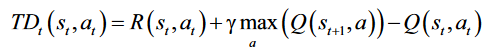 where γ is called
the discount factor. The Q-value of the best action performed in the future state  is  discounted by the factor γ.

In order to perform better in every action for the RL to reach its goal, we have to increase the Q-values of actions when we find high temporal differences. At each iteration, we update the Q-values from time t-1 (previous iteration) to t (current iteration) through the g equation, called the Bellman equation 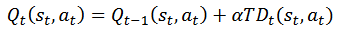 
where 𝛼 ε ℝ is the learning rate, which dictates how fast the learning of the Q-values happen.
Its value is usually between 0 and 1. 
The lower the value of 𝛼,the smaller the updates of the Q-values, and Q-learning will take more time. The higher its value, the bigger the updates of the Q-values and the faster the Q-learning
will be. When the temporal difference is high, the Q-value increases.

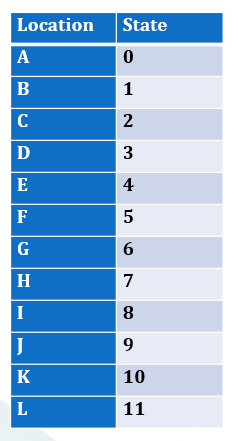

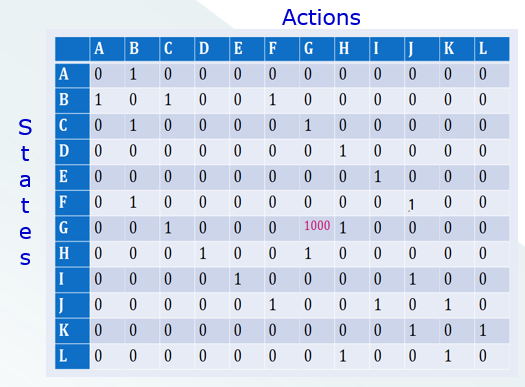

In [1]:
# Importing the libraries
import numpy as np

# Setting the parameters gamma and alpha for the Q-Learning
gamma = 0.75
alpha = 0.9


### BUILDING THE ENVIRONMENT

In [2]:
# Defining the states
location_to_state = {'A': 0,
                     'B': 1,
                     'C': 2,
                     'D': 3,
                     'E': 4,
                     'F': 5,
                     'G': 6,
                     'H': 7,
                     'I': 8,
                     'J': 9,
                     'K': 10,
                     'L': 11}

# Defining the actions
actions = [0,1,2,3,4,5,6,7,8,9,10,11]

In [3]:
# Defining the rewards
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
              [1,0,1,0,0,1,0,0,0,0,0,0],
              [0,1,0,0,0,0,1,0,0,0,0,0],
              [0,0,0,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,1,0,0,0],
              [0,1,0,0,0,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1000,1,0,0,0,0],
              [0,0,0,1,0,0,1,0,0,0,0,1],
              [0,0,0,0,1,0,0,0,0,1,0,0],
              [0,0,0,0,0,1,0,0,1,0,1,0],
              [0,0,0,0,0,0,0,0,0,1,0,1],
              [0,0,0,0,0,0,0,1,0,0,1,0]])

### IMPLEMENTING THE Q-LEARNING

In [4]:
#Initializing the Q-values
Q = np.array(np.zeros([12,12])) 

In [5]:
#implementing the Q-Learning process
for i in range(1000):
   current_state = np.random.randint(0,12)
   playable_actions = []
   for j in range(12):
       if R[current_state, j] > 0:
           playable_actions.append(j)
   next_state = np.random.choice(playable_actions)
   TD = R[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]
   Q[current_state, next_state] = Q[current_state, next_state] + alpha * TD
print("Q-values:")
print(Q.astype(int))

Q-values:
[[   0 1689    0    0    0    0    0    0    0    0    0    0]
 [1267    0 2251    0    0 1267    0    0    0    0    0    0]
 [   0 1689    0    0    0    0 3000    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2250    0    0    0    0]
 [   0    0    0    0    0    0    0    0  714    0    0    0]
 [   0 1689    0    0    0    0    0    0    0  951    0    0]
 [   0    0 2251    0    0    0 3999 2250    0    0    0    0]
 [   0    0    0 1688    0    0 2999    0    0    0    0 1688]
 [   0    0    0    0  537    0    0    0    0  951    0    0]
 [   0    0    0    0    0 1267    0    0  714    0 1267    0]
 [   0    0    0    0    0    0    0    0    0  951    0 1688]
 [   0    0    0    0    0    0    0 2250    0    0 1267    0]]


### ROBOT NAVIGATION WITH A PREDEFINED GOAL STATE

In [6]:
# Making a mapping from the states to the locations
state_to_location = {state: location for location, state in location_to_state.items()}    
# Making a function that returns the shortest route from a starting to ending location
def route(starting_location, ending_location):
    route = [starting_location]
    next_location = starting_location
    while (next_location != ending_location):
        starting_state = location_to_state[starting_location]
        next_state = np.argmax(Q[starting_state,])
        next_location = state_to_location[next_state]
        route.append(next_location)
        starting_location = next_location
    return route

In [7]:
# Printing the final route
print('Route:')
print(route('E','G'))

Route:
['E', 'I', 'J', 'F', 'B', 'C', 'G']


### ROBOT NAVIGATION WITH CHOSEN GOAL STATE

In [8]:
# Importing the libraries
import numpy as np

# Setting the parameters gamma and alpha for the Q-Learning
gamma = 0.75
alpha = 0.9

In [9]:
#BUILDING THE ENVIRONMENT

# Defining the states
location_to_state = {'A': 0,
                     'B': 1,
                     'C': 2,
                     'D': 3,
                     'E': 4,
                     'F': 5,
                     'G': 6,
                     'H': 7,
                     'I': 8,
                     'J': 9,
                     'K': 10,
                     'L': 11}

# Defining the actions
actions = [0,1,2,3,4,5,6,7,8,9,10,11]

In [10]:
# Defining the rewards
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
              [1,0,1,0,0,1,0,0,0,0,0,0],
              [0,1,0,0,0,0,1,0,0,0,0,0],
              [0,0,0,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,1,0,0,0],
              [0,1,0,0,0,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,1,0,0,0,0],
              [0,0,0,1,0,0,1,0,0,0,0,1],
              [0,0,0,0,1,0,0,0,0,1,0,0],
              [0,0,0,0,0,1,0,0,1,0,1,0],
              [0,0,0,0,0,0,0,0,0,1,0,1],
              [0,0,0,0,0,0,0,1,0,0,1,0]])

In [11]:
# BUILDING THE AI SOLUTION WITH Q-LEARNING

# Making a mapping from the states to the locations
state_to_location = {state: location for location, state in location_to_state.items()}

In [12]:
# Making a function that returns the shortest route from a starting to ending location
def route(starting_location, ending_location):
    R_new = np.copy(R)
    ending_state = location_to_state[ending_location]
    R_new[ending_state, ending_state] = 1000
    Q = np.array(np.zeros([12,12]))
    
    for i in range(1000):
        current_state = np.random.randint(0,12)
        playable_actions = []
        for j in range(12):
            if R_new[current_state, j] > 0:
                playable_actions.append(j)
        next_state = np.random.choice(playable_actions)
        TD = R_new[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]
        Q[current_state, next_state] = Q[current_state, next_state] + alpha * TD
    print("Q-values:")
    print(Q.astype(int))
    route = [starting_location]
    print('Route:', starting_location)
    next_location = starting_location
    while (next_location != ending_location):
        starting_state = location_to_state[starting_location]
        next_state = np.argmax(Q[starting_state,])
        next_location = state_to_location[next_state]
        route.append(next_location)
        starting_location = next_location
        print(next_location)
    return route

In [13]:
# GOING INTO PRODUCTION

# Printing the final route
route('E','G')

Q-values:
[[   0 1689    0    0    0    0    0    0    0    0    0    0]
 [1267    0 2250    0    0 1267    0    0    0    0    0    0]
 [   0 1689    0    0    0    0 2999    0    0    0    0    0]
 [   0    0    0    0    0    0    0 2248    0    0    0    0]
 [   0    0    0    0    0    0    0    0  714    0    0    0]
 [   0 1689    0    0    0    0    0    0    0  951    0    0]
 [   0    0 2250    0    0    0 3998 2248    0    0    0    0]
 [   0    0    0 1687    0    0 2996    0    0    0    0 1687]
 [   0    0    0    0  536    0    0    0    0  951    0    0]
 [   0    0    0    0    0 1267    0    0  714    0 1266    0]
 [   0    0    0    0    0    0    0    0    0  951    0 1687]
 [   0    0    0    0    0    0    0 2248    0    0 1266    0]]
Route: E
I
J
F
B
C
G


['E', 'I', 'J', 'F', 'B', 'C', 'G']

In [14]:
route('E','D')

Q-values:
[[   0  952    0    0    0    0    0    0    0    0    0    0]
 [ 715    0 1268    0    0  714    0    0    0    0    0    0]
 [   0  952    0    0    0    0 1689    0    0    0    0    0]
 [   0    0    0 3999    0    0    0 2251    0    0    0    0]
 [   0    0    0    0    0    0    0    0  715    0    0    0]
 [   0  952    0    0    0    0    0    0    0  952    0    0]
 [   0    0 1268    0    0    0 1689 2251    0    0    0    0]
 [   0    0    0 3000    0    0 1689    0    0    0    0 1689]
 [   0    0    0    0  537    0    0    0    0  952    0    0]
 [   0    0    0    0    0  715    0    0  714    0 1268    0]
 [   0    0    0    0    0    0    0    0    0  952    0 1689]
 [   0    0    0    0    0    0    0 2251    0    0 1268    0]]
Route: E
I
J
K
L
H
D


['E', 'I', 'J', 'K', 'L', 'H', 'D']

### ROBOT NAVGATION WITH INTERMEDIATE GOAL STATE

In [15]:
# Importing the libraries
import numpy as np

# Setting the parameters gamma and alpha for the Q-Learning
gamma = 0.75
alpha = 0.9

In [16]:
# BUILDING THE ENVIRONMENT

# Defining the states
location_to_state = {'A': 0,
                     'B': 1,
                     'C': 2,
                     'D': 3,
                     'E': 4,
                     'F': 5,
                     'G': 6,
                     'H': 7,
                     'I': 8,
                     'J': 9,
                     'K': 10,
                     'L': 11}

# Defining the actions
actions = [0,1,2,3,4,5,6,7,8,9,10,11]

In [17]:
# Defining the rewards
R = np.array([[0,1,0,0,0,0,0,0,0,0,0,0],
              [1,0,1,0,0,1,0,0,0,0,0,0],
              [0,1,0,0,0,0,1,0,0,0,0,0],
              [0,0,0,0,0,0,0,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,1,0,0,0],
              [0,1,0,0,0,0,0,0,0,1,0,0],
              [0,0,1,0,0,0,1,1,0,0,0,0],
              [0,0,0,1,0,0,1,0,0,0,0,1],
              [0,0,0,0,1,0,0,0,0,1,0,0],
              [0,0,0,0,0,1,0,0,1,0,1,0],
              [0,0,0,0,0,0,0,0,0,1,0,1],
              [0,0,0,0,0,0,0,1,0,0,1,0]])

In [18]:
# BUILDING THE AI SOLUTION WITH Q-LEARNING

# Making a mapping from the states to the locations
state_to_location = {state: location for location, state in location_to_state.items()}


In [19]:
# Making a function that returns the shortest route from a starting to ending location
def route(starting_location, ending_location):
    R_new = np.copy(R)
    ending_state = location_to_state[ending_location]
    R_new[ending_state, ending_state] = 1000
    Q = np.array(np.zeros([12,12]))
    for i in range(1000):
        current_state = np.random.randint(0,12)
        playable_actions = []
        for j in range(12):
            if R_new[current_state, j] > 0:
                playable_actions.append(j)
        next_state = np.random.choice(playable_actions)
        TD = R_new[current_state, next_state] + gamma * Q[next_state, np.argmax(Q[next_state,])] - Q[current_state, next_state]
        Q[current_state, next_state] = Q[current_state, next_state] + alpha * TD
    print("Q-values:")
    print(Q.astype(int))  
    route = [starting_location]
    print('Route:', starting_location)
    next_location = starting_location
    while (next_location != ending_location):
        starting_state = location_to_state[starting_location]
        next_state = np.argmax(Q[starting_state,])
        next_location = state_to_location[next_state]
        route.append(next_location)
        starting_location = next_location
        print(next_location)
    return route

In [20]:
# GOING INTO PRODUCTION

# Making the final function that returns the optimal route
def best_route(starting_location, intermediary_location, ending_location):
    return route(starting_location, intermediary_location) + route(intermediary_location, ending_location)[1:]

In [21]:
# Printing the final route
best_route('E', 'K', 'G')

Q-values:
[[   0 1265    0    0    0    0    0    0    0    0    0    0]
 [ 950    0  950    0    0 1686    0    0    0    0    0    0]
 [   0 1265    0    0    0    0 1265    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1687    0    0    0    0]
 [   0    0    0    0    0    0    0    0 1687    0    0    0]
 [   0 1265    0    0    0    0    0    0    0 2249    0    0]
 [   0    0  950    0    0    0 1265 1687    0    0    0    0]
 [   0    0    0 1265    0    0 1265    0    0    0    0 2249]
 [   0    0    0    0 1266    0    0    0    0 2249    0    0]
 [   0    0    0    0    0 1687    0    0 1687    0 2997    0]
 [   0    0    0    0    0    0    0    0    0 2246 3995 2246]
 [   0    0    0    0    0    0    0 1686    0    0 2997    0]]
Route: E
I
J
K
Q-values:
[[   0 1676    0    0    0    0    0    0    0    0    0    0]
 [1258    0 2234    0    0 1258    0    0    0    0    0    0]
 [   0 1676    0    0    0    0 2986    0    0    0    0    0]
 [   0    0    0   

['E', 'I', 'J', 'K', 'L', 'H', 'G']